### Libraries Used

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import statsmodels.api as sm #OLS
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings
from sklearn.preprocessing import StandardScaler
warnings.filterwarnings('ignore')

# Loading the DataSet

In [2]:
train_df = pd.read_csv('train.csv')

test_df = pd.read_csv('test.csv')

sample_df = pd.read_csv('sample_submission_V9Inaty.csv')

In [31]:
sample_df.shape

(233599, 3)

# Checking the basic about the data

In [3]:
train_df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [4]:
test_df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [ ]:
train_df.shape, test_df.head()

In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [6]:
#Concatenating train and test data
train_df ['Source'] = 'train'

test_df ['Source'] = 'test'

df = pd.concat([train_df, test_df])

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 13 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     783667 non-null  int64  
 1   Product_ID                  783667 non-null  object 
 2   Gender                      783667 non-null  object 
 3   Age                         783667 non-null  object 
 4   Occupation                  783667 non-null  int64  
 5   City_Category               783667 non-null  object 
 6   Stay_In_Current_City_Years  783667 non-null  object 
 7   Marital_Status              783667 non-null  int64  
 8   Product_Category_1          783667 non-null  int64  
 9   Product_Category_2          537685 non-null  float64
 10  Product_Category_3          237858 non-null  float64
 11  Purchase                    550068 non-null  float64
 12  Source                      783667 non-null  object 
dtypes: float64(3),

In [ ]:
df.shape

# Plotting the count of Men/Female

<AxesSubplot:xlabel='Gender', ylabel='count'>

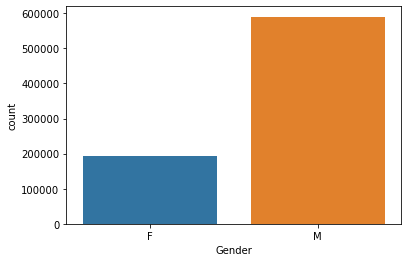

In [8]:
sns.countplot(df['Gender'])

# plotting the Count of Age and Gender

<AxesSubplot:xlabel='Age', ylabel='count'>

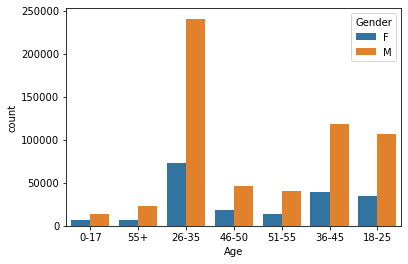

In [9]:
sns.countplot(df['Age'], hue=df['Gender'])

# plotting the purchase pattern b/w genders

Text(0, 0.5, 'Gender')

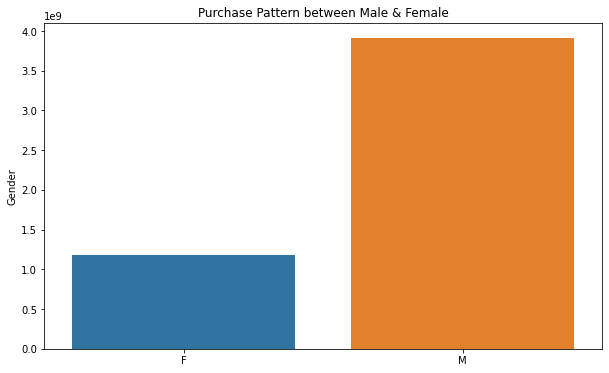

In [10]:
plt.figure(figsize = (10,6))
plt.title("Purchase Pattern between Male & Female")

#defining bar plot here
sns.barplot(x = df.Gender.unique(), y = df.groupby('Gender').Purchase.sum().to_list())

#Adding labels
plt.ylabel("Gender")

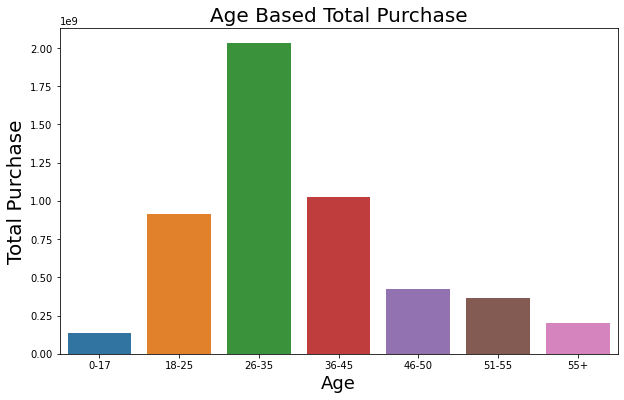

In [11]:
#26-35 Age group people purchases more compared to other age group
plt.figure(figsize = (10,6))
plt.xlabel('Age Group', fontsize = 18)
plt.ylabel('Total Purchase', fontsize = 20)
plt.title('Age Based Total Purchase', fontsize = 20)
sns.barplot(x = df.groupby('Age').Purchase.sum().index, y = df.groupby('Age').Purchase.sum().to_list());

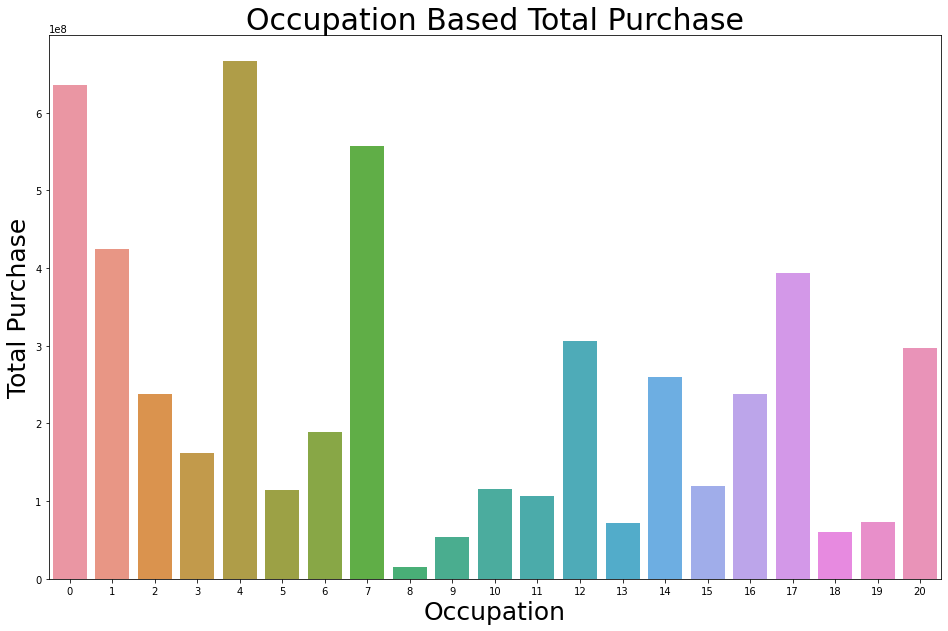

In [12]:
plt.figure(figsize = (16,10))
plt.xlabel('Occupation', fontsize = 25)
plt.ylabel('Total Purchase', fontsize = 25)
plt.title('Occupation Based Total Purchase', fontsize = 30)
sns.barplot(x = list(range(21)), y = df.groupby('Occupation').Purchase.sum().to_list());

Text(0.5, 0, 'City Cat')

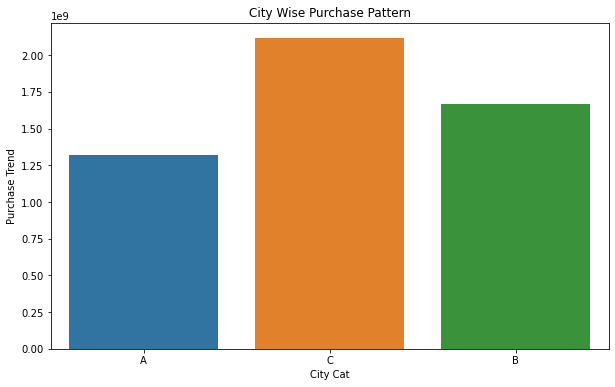

In [13]:
plt.figure(figsize = (10,6))
plt.title("City Wise Purchase Pattern")

#defining bar plot here
sns.barplot(x = df.City_Category.unique(), y = df.groupby('City_Category').Purchase.sum().to_list())

#Adding labels
plt.ylabel("Purchase Trend")
plt.xlabel("City Cat")

Text(0, 0.5, 'Purchase Trend')

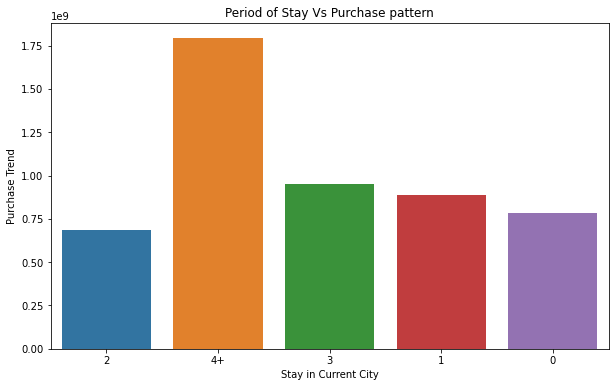

In [14]:
plt.figure(figsize = (10,6))
plt.title("Period of Stay Vs Purchase pattern")

#defining bar plot here
sns.barplot(x = df.Stay_In_Current_City_Years.unique(), y = df.groupby('Stay_In_Current_City_Years').Purchase.sum().to_list())

#Adding labels
plt.xlabel("Stay in Current City")
plt.ylabel("Purchase Trend")

# Since 70% of data is missing in Cat_3, dropping that input feature

In [15]:
df = df.drop(['Product_Category_3'], axis=1)

# 30% of data is missing in Cat_2, so replacing with Mean of it 

In [16]:
df['Product_Category_2'].fillna((df['Product_Category_2'].mean()), inplace=True)

# Dropping USER ID and Product ID since i think it wont add value to the model

In [17]:
df = df.drop(['User_ID','Product_ID'], axis=1)

In [18]:
df.head(2)

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase,Source
0,F,0-17,10,A,2,0,3,9.844506,8370.0,train
1,F,0-17,10,A,2,0,1,6.000000,15200.0,train


# Pre-processing 
### Chaning all variables to object type to encode (this would add good number of input features to my dataset

In [19]:
#Preprocessing
df.Occupation = df.Occupation.apply(lambda x : str(x))
#Changing all variable to encode to object type

df.Marital_Status =  df.Marital_Status.apply(lambda x : str(x))

df.Product_Category_1 = df.Product_Category_1.apply(lambda x : str(x))

df.Product_Category_2 = df.Product_Category_2.apply(lambda x : str(x))

df_number_columns = df.select_dtypes(include=np.number).columns


df_category_columns = df.select_dtypes(exclude=np.number).columns


data_to_encode = df[df_category_columns].drop(['Source'], axis = 1)


data_to_encode

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2
0,F,0-17,10,A,2,0,3,9.844505612021909
1,F,0-17,10,A,2,0,1,6.0
2,F,0-17,10,A,2,0,12,9.844505612021909
3,F,0-17,10,A,2,0,12,14.0
4,M,55+,16,C,4+,0,8,9.844505612021909
...,...,...,...,...,...,...,...,...
233594,F,26-35,15,B,4+,1,8,9.844505612021909
233595,F,26-35,15,B,4+,1,5,8.0
233596,F,26-35,15,B,4+,1,1,5.0
233597,F,46-50,1,C,4+,0,10,16.0


## Encoding the data 

In [20]:
data_encoded = pd.get_dummies(data_to_encode, drop_first = True)
data_encoded.shape

(783667, 70)

# Conatinating the data for final time

In [21]:
final_df = pd.concat([df[df_number_columns], data_encoded, df[['Source']]], axis = 1)

In [22]:
final_df.head()

,Purchase,Gender_M,Age_18-25,Age_26-35,Age_36-45,Age_46-50,Age_51-55,Age_55+,Occupation_1,Occupation_10,...,Product_Category_2_2.0,Product_Category_2_3.0,Product_Category_2_4.0,Product_Category_2_5.0,Product_Category_2_6.0,Product_Category_2_7.0,Product_Category_2_8.0,Product_Category_2_9.0,Product_Category_2_9.844505612021909,Source
0,8370.0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,train
1,15200.0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,train
2,1422.0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,train
3,1057.0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,train
4,7969.0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,train


## splitting the Data for Train and Test based filtered based on the sourse column created in the begining 

In [23]:
train_data = final_df.loc[final_df['Source'] == 'train']

test_data = final_df.loc[final_df['Source'] == 'test']

# splitting the train data into input and ouput as separate -- this will help the machine to learn the pattern 
# Dropping Purchase from Test_X data (NAN currently)

In [24]:
train_data.drop(['Source'] , axis = 1, inplace = True)

test_data.drop(['Source'] , axis = 1, inplace = True)

train_X = train_data.drop(['Purchase'], axis = 1)

train_y = train_data['Purchase']

test_X = test_data.drop('Purchase', axis = 1)

# fitting the model and predicting for train data set

In [25]:
lm = LinearRegression()

lm.fit(train_X, train_y)

train_pred = lm.predict(train_X)

In [26]:
#checking the error between actual and predicted outcome
print('Train MAE: ',metrics.mean_absolute_error(train_y, train_pred))

print('Train MSE: ',metrics.mean_squared_error(train_y, train_pred))

print('Train RSME: ',np.sqrt(metrics.mean_squared_error(train_y, train_pred)))

print('Train R2: ', metrics.r2_score(train_y, train_pred))

Train MAE:  2268.9702762802067
Train MSE:  9009612.84545222
Train RSME:  3001.6017133277724
Train R2:  0.6429169345344348


### predicting for actual test set

In [27]:
test_pred = lm.predict(test_X)

In [28]:
sample_df['Purchase'] = test_pred

In [30]:
sample_df.shape

(233599, 3)

In [32]:
sample_df.head()

,Purchase,User_ID,Product_ID
0,13197.374002,1000004,P00128942
1,11041.779249,1000009,P00113442
2,5990.980752,1000010,P00288442
3,2295.584966,1000010,P00145342
4,2343.975816,1000011,P00053842


In [37]:
sample_df["Purchase"] = sample_df["Purchase"].astype(int)

In [38]:
sample_df.head()

,Purchase,User_ID,Product_ID
0,13197,1000004,P00128942
1,11041,1000009,P00113442
2,5990,1000010,P00288442
3,2295,1000010,P00145342
4,2343,1000011,P00053842


In [39]:
sample_df.to_csv('Finalprediction_of_Purchase.csv', index = False)

<AxesSubplot:xlabel='Purchase'>

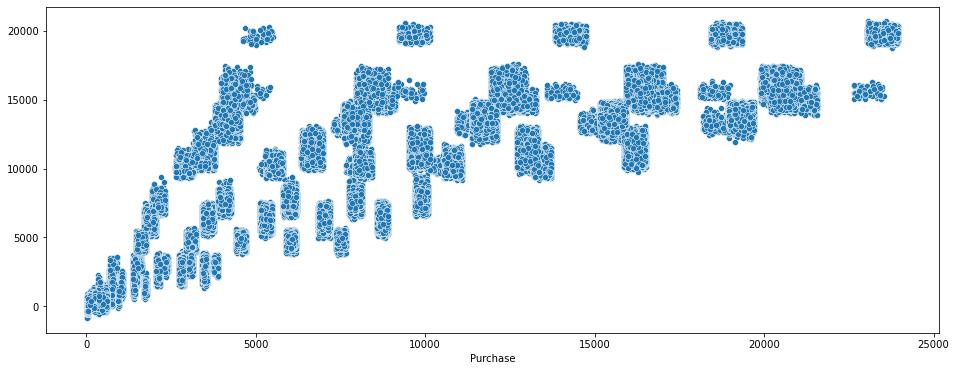

In [41]:
plt.figure(figsize=(16,6))
sns.scatterplot(x = train_y, y = train_pred)

In [42]:
reg_ols = sm.OLS(train_y, train_X).fit()

In [43]:
reg_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:               Purchase   R-squared (uncentered):                   0.913
Model:                            OLS   Adj. R-squared (uncentered):              0.913
Method:                 Least Squares   F-statistic:                          8.244e+04
Date:                Fri, 19 Mar 2021   Prob (F-statistic):                        0.00
Time:                        08:08:51   Log-Likelihood:                     -5.2041e+06
No. Observations:              550068   AIC:                                  1.041e+07
Df Residuals:                  549998   BIC:                                  1.041e+07
Df Model:                          70                                                  
Covariance Type:            nonrobust                                                  
========================================================================================================
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
Gender_M                               129.8692     10.171     12.769      0.000     109.935     149.803
Age_18-25                             3971.5922     36.230    109.621      0.000    3900.582    4042.602
Age_26-35                             4170.8854     35.716    116.780      0.000    4100.884    4240.887
Age_36-45                             4286.5360     36.437    117.644      0.000    4215.121    4357.951
Age_46-50                             4305.0870     38.625    111.458      0.000    4229.383    4380.791
Age_51-55                             4547.4642     39.210    115.976      0.000    4470.613    4624.315
Age_55+                               4403.7748     42.281    104.155      0.000    4320.905    4486.644
Occupation_1                           233.9530     18.633     12.556      0.000     197.433     270.473
Occupation_10                         3735.1223     40.663     91.855      0.000    3655.423    3814.821
Occupation_11                          304.5319     31.312      9.726      0.000     243.162     365.902
Occupation_12                          501.0372     21.267     23.560      0.000     459.355     542.719
Occupation_13                          270.9277     40.261      6.729      0.000     192.017     349.838
Occupation_14                          441.4659     22.223     19.865      0.000     397.910     485.022
Occupation_15                          576.3444     30.596     18.837      0.000     516.377     636.312
Occupation_16                          307.2120     23.028     13.341      0.000     262.078     352.346
Occupation_17                          364.3114     19.680     18.512      0.000     325.740     402.883
Occupation_18                          188.8404     40.155      4.703      0.000     110.138     267.543
Occupation_19                          340.9012     35.876      9.502      0.000     270.586     411.216
Occupation_2                           327.5982     22.445     14.596      0.000     283.607     371.589
Occupation_20                          152.2839     20.742      7.342      0.000     111.629     192.938
Occupation_3                           502.6891     26.298     19.115      0.000     451.145     554.233
Occupation_4                           448.5713     17.853     25.126      0.000     413.580     483.563
Occupation_5                           268.1854     30.625      8.757      0.000     208.162     328.209
Occupation_6                           418.7181     25.022     16.734      0.000     369.675     467.761
Occupation_7                           317.9113     17.555     18.110      0.000     283.505     352.318
Occupation_8                            -7.6

<AxesSubplot:xlabel='Purchase', ylabel='Purchase'>

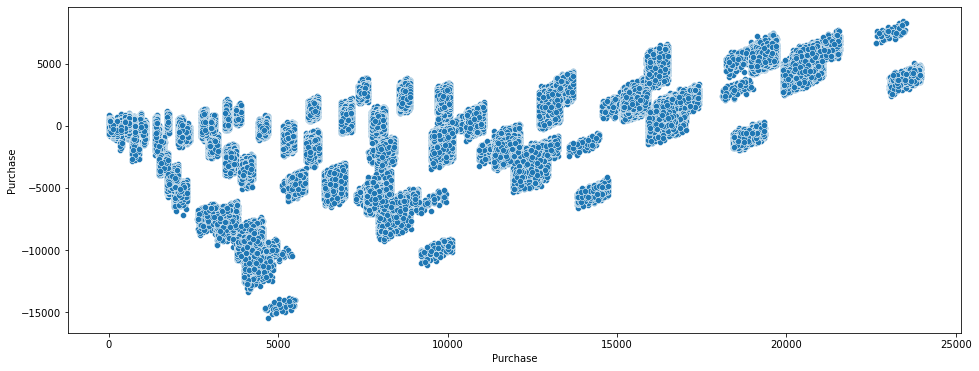

In [44]:
plt.figure(figsize=(16,6))
sns.scatterplot(x = train_y, y = (train_y - train_pred))